In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import anscombe

%matplotlib inline

def linear(x, a, b):
    return a*x + b

Consider the fits for Anscombe's quartet:

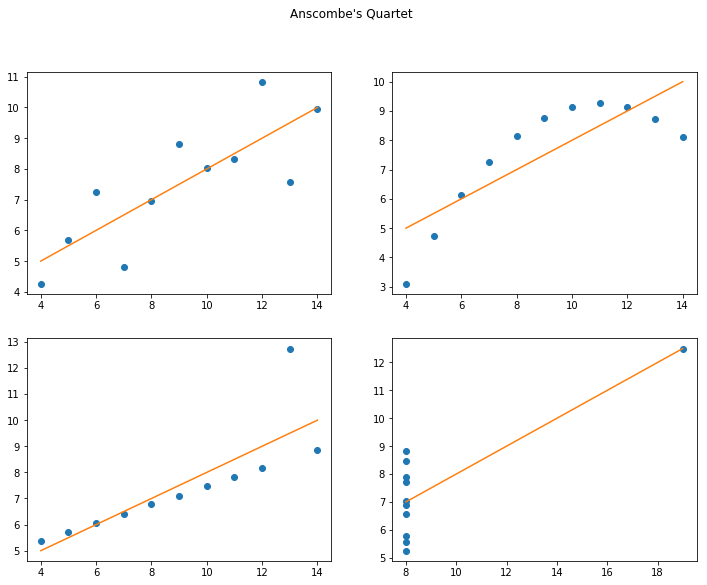

In [2]:
fig, ax = anscombe.plot_fits()

All four data sets give the same fitting parameters and the same parameter covariances, but some of them are clearly worse fits than others. We would like a way to be a bit more rigorous about that statement.

Before we can go there, though, we need to think a little bit about what we mean by a "good fit."  Anscombe's quartet actually shows us four different ways in which the quality of a fit can be limited.

We begin by looking at the *residual*, which is the difference between the data value and the value predicted by the fit. This is a vector with the same number of dimensions as the number of measurements in the original data set, which may be unwieldy. It *can* give us some insight, however.

In [3]:
def residual(df):
    """Compute the residual for a linear fit of data in a dataframe.
    
    Parameters:
    -----------
    df : a pandas DataFrame containing data in columns 'x' and 'y'.
    
    Returns:
    --------
    a numpy array containing the residual.
    """
    
    popt, pcov = curve_fit(linear, df.x, df.y)
    
    predicted = linear(df.x, *popt)
    return (df.y - predicted).values

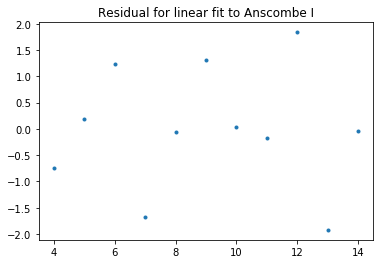

In [23]:
plt.plot(anscombe.DATADFS[0].x, residual(anscombe.DATADFS[0]), ".")
title = plt.title("Residual for linear fit to Anscombe I")

The first data set shows us more or less what we might expect to see for a residual. No obvious mean or shape, and if we plotted it as a histogram it might look something like a bell curve (though with only 11 observations it wouldn't be a very good one).

This gives us the first (and most obvious) way in which the quality of a fit can be limited: by the quality of the data. If we assume that this data consists of a linear signal plus noise, the magnitude of the noise affects our ability to extract the linear signal.

The only real fix for this is to collect more or better data.

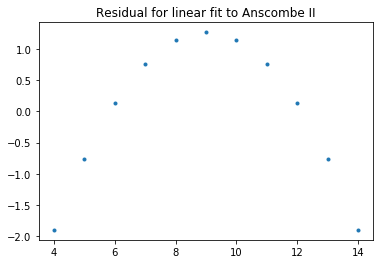

In [24]:
plt.plot(anscombe.DATADFS[1].x, residual(anscombe.DATADFS[1]), ".")
title = plt.title("Residual for linear fit to Anscombe II")

Next, the second data set shows us a systematic error: we've chosen the wrong model for our fit. This is clear from the plot because the residual has an obvious shape; it wouldn't necessarily be obvious from just looking at the numbers.

The fix here is to use a different model. We'll get to that in a minute.

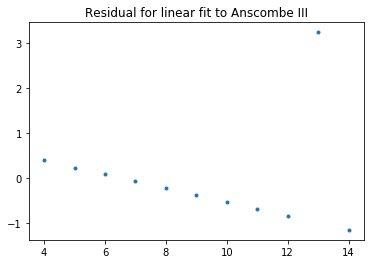

In [26]:
plt.plot(anscombe.DATADFS[2].x, residual(anscombe.DATADFS[2]), ".")
title = plt.title("Residual for linear fit to Anscombe III")

The residual for Anscombe III shows that the inclusion of outliers can throw the whole fit out of whack.

The fix is to appropriately deal with the outlier (though outlier detection is a complicated topic).

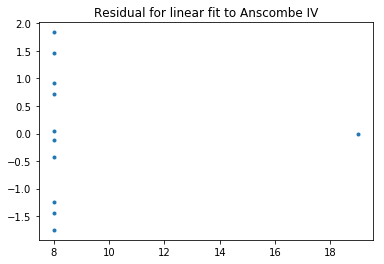

In [27]:
plt.plot(anscombe.DATADFS[3].x, residual(anscombe.DATADFS[3]), ".")
title = plt.title("Residual for linear fit to Anscombe IV")

Anscombe IV is kind of a pathological case. If you get a residual (or data set) that looks like this, you probably shouldn't be trying to fit any kind of function to it; you should instead be looking at why you have so many measurements at the same value of independent variable, and only one that differs.  Maybe you should be plotting a different measurement? 

## Trying different Models

## Detecting and dealing with Outliers

## Plotting fits with uncertainty